In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, roc_auc_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import Normalizer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [2]:
data16 = pd.read_excel('./Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xls')
data16

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,...,20.8474,20.8118,21.1175,-0.6994,-0.7071,-0.6963,2.8853,2.6599,2.6317,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,...,21.2621,22.5004,21.5821,-0.5567,-0.4968,-0.6597,2.3022,2.2664,2.5161,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,...,21.1262,20.0279,17.4401,-0.9072,-0.8790,-0.4470,3.3112,3.4306,3.0697,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,...,19.3274,19.1782,19.8930,-0.9473,-0.8404,-0.3153,3.4237,2.9606,3.0033,Siirt_Pistachio


In [3]:
data16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_Axis     2148 non-null   float64
 3   Minor_Axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Convex_Area    2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Mean_RR        2148 non-null   float64
 17  Mean_RG        2148 non-null   float64
 18  Mean_RB 

In [4]:
data16['Class'].value_counts()

Kirmizi_Pistachio    1232
Siirt_Pistachio       916
Name: Class, dtype: int64

In [5]:
labels = ['Kirmizi_Pistachio', 'Siit_Pistachio']
one_hot_encode = lambda x: 0 if x == 'Kirmizi_Pistachio' else 1
one_hot_encode_revert = lambda x: labels[x]

In [6]:
X = data16.drop('Class', axis=1)
y = data16['Class']
y = y.apply(one_hot_encode)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

In [7]:
scaler = StandardScaler()
pca = PCA()
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('knn', knn)])

In [8]:
count_sqrt = math.floor(np.sqrt(X.shape[0]))
print('dataset sample count: %i' % X.shape[0])
print('square root: %i' % count_sqrt)

dataset sample count: 2148
square root: 46


## Grid Search

In [9]:
params = {
    'pca__n_components': [5, 10, 15, X.shape[1]],
    'knn__n_neighbors': np.arange(3, count_sqrt + 1, 2),
    'knn__metric': ['euclidean', 'minkowski', 'manhattan'],
    # 'knn__metric': ['euclidean', 'minkowski', 'manhattan', 'mahalanobis']
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

grid = GridSearchCV(pipe, params, cv=10, scoring=scoring, refit='accuracy', return_train_score=False, verbose=1)
grid

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'minkowski', 'manhattan'],
                         'knn__n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45]),
                         'pca__n_components': [5, 10, 15, 28]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=1)

In [10]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 264 candidates, totalling 2640 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'minkowski', 'manhattan'],
                         'knn__n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45]),
                         'pca__n_components': [5, 10, 15, 28]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=1)

In [11]:
grid.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 15, 'pca__n_components': 15}

In [12]:
print("---- GridSearchCV set stats:")
for label, amount in zip(labels, np.bincount(y_train)):
    print("%s: %i datapoints" % (label, amount))

---- GridSearchCV set stats:
Kirmizi_Pistachio: 985 datapoints
Siit_Pistachio: 733 datapoints


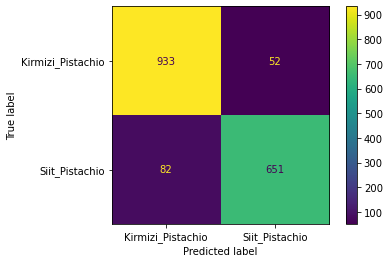

In [13]:
plot_confusion_matrix(grid, X_train, y_train, display_labels=labels)  
plt.show()

## Test

In [14]:
print("---- test set stats:")
for label, amount in zip(labels, np.bincount(y_test)):
    print("%s: %i datapoints" % (label, amount))

---- test set stats:
Kirmizi_Pistachio: 247 datapoints
Siit_Pistachio: 183 datapoints


---- 16-feature dataset test results
Grid Search CV (10 folds) + PCA found the following hyperparameters:
knn__metric: manhattan
knn__n_neighbors: 15
pca__n_components: 15


---- test metrics:
   accuracy  f1_score  precision    recall
0  0.890698  0.868347   0.890805  0.846995


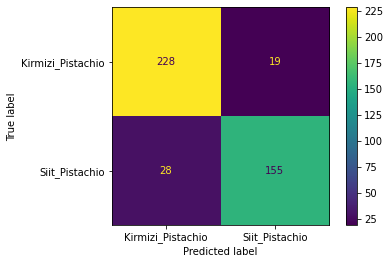

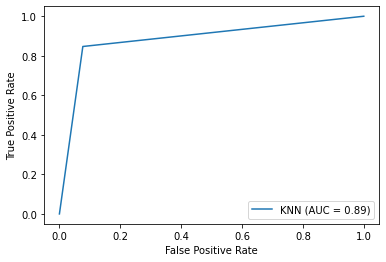

In [15]:
y_pred = grid.predict(X_test)

test_metrics = pd.DataFrame({
    "accuracy": [accuracy_score(y_test, y_pred)],
    "f1_score": [f1_score(y_test, y_pred)],
    "precision": [precision_score(y_test, y_pred)],
    "recall": [recall_score(y_test, y_pred)],
})

print("---- 16-feature dataset test results")
print("Grid Search CV (10 folds) + PCA found the following hyperparameters:")
print("\n".join(["%s: %s" % (param, value) for param, value in grid.best_params_.items()]))
print("\n")
print("---- test metrics:")
print(test_metrics)

cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN')
display.plot()
plt.show()